In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Loading Dataset
data=pd.read_csv("EastWestAirlines.csv")
data.head()
     

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Data Preprocessing and EDA


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
# Renaming columns
data = data.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
data.head()
     

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
# Checking for all the values in dataset of type integer, if not replacing them with nan
def check_int(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [6]:
check_int(data[data.columns])


In [7]:
data.isna().sum()


ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [8]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


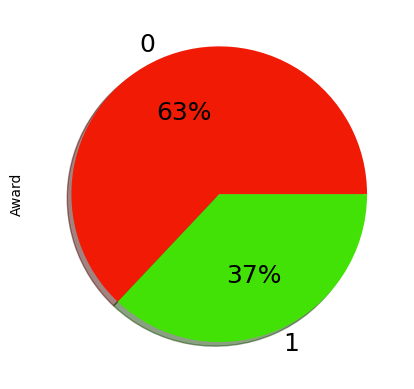

In [9]:
# Checking previously awarded miles ratio
data['Award'].value_counts().plot(kind='pie', autopct='%2.0f%%', fontsize='18', 
                                        colors = ['#F11A05','#43E206'], shadow =True)
plt.show()

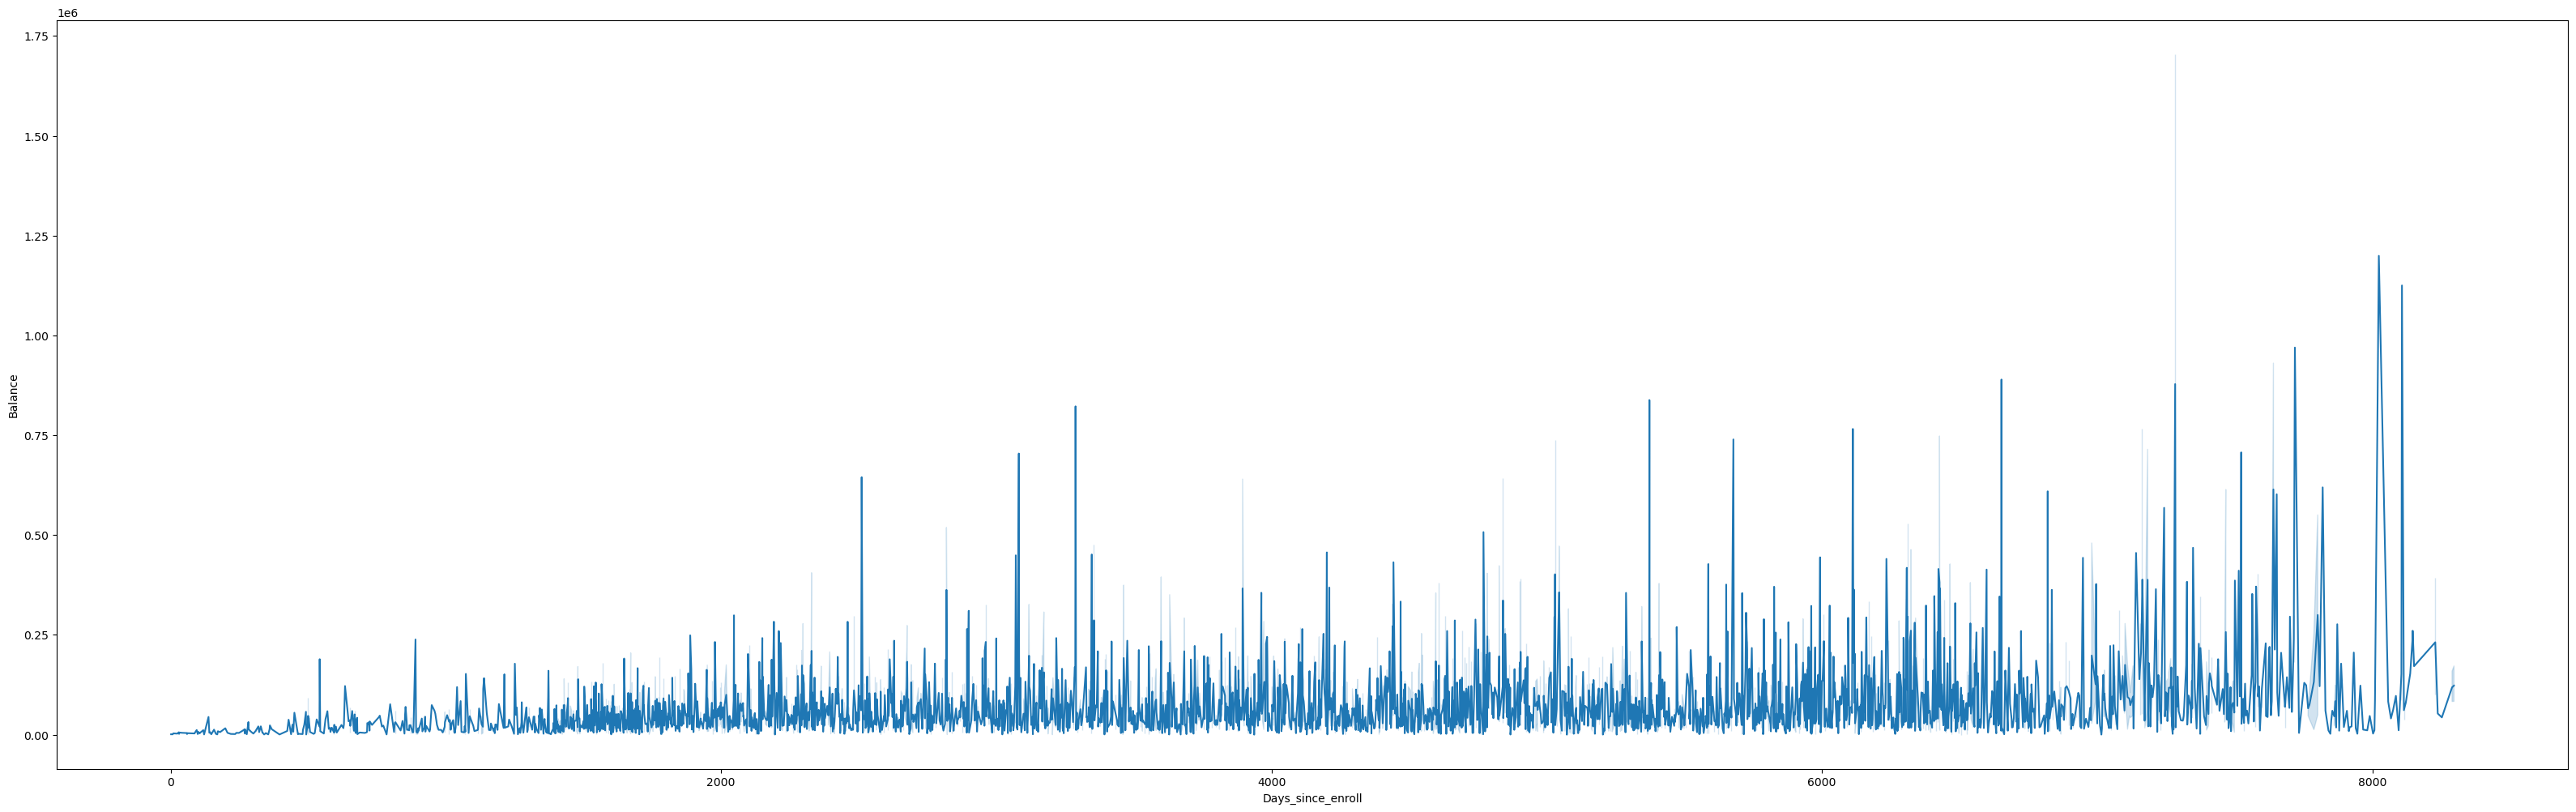

In [10]:

# Checking relation between Balance and Days_since_enroll
import seaborn as sns
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = data)

# Agglomerative Clustering


In [11]:
data1 = data.drop('ID', axis = 1)
data1.head()
     

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
# We will check clustering for two different scaling functions
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [14]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.862

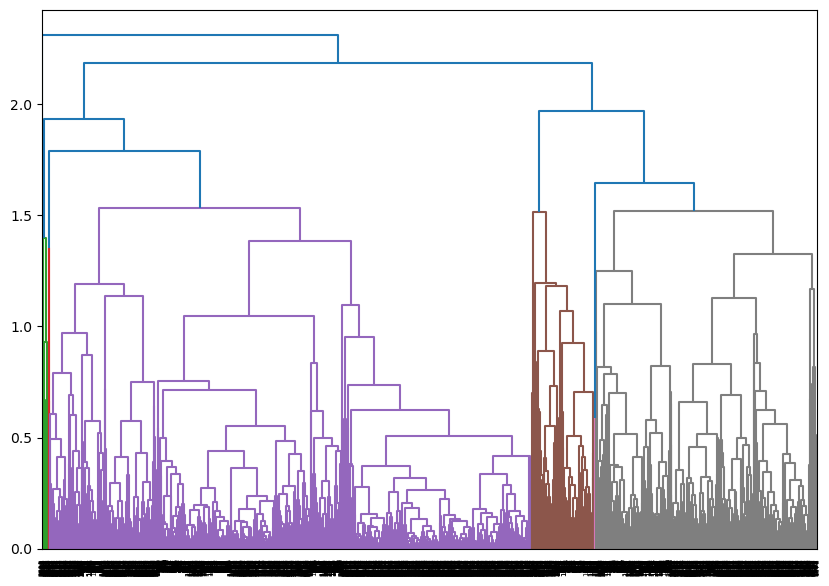

In [15]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))
     

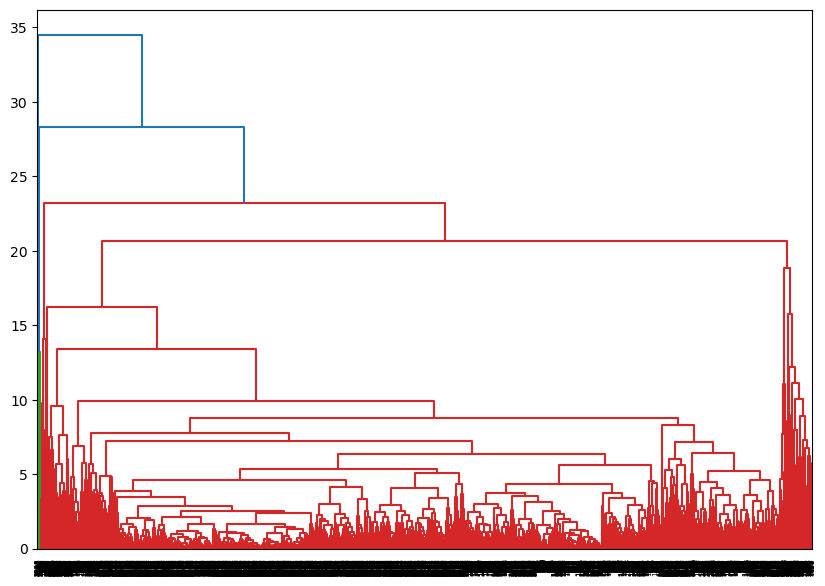

In [16]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [17]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
H_clusters
     

AgglomerativeClustering(n_clusters=5)

In [18]:
# Using data normalized by MinMaxScaler 
y=pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()
     

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [19]:
# Adding clusters to dataset
# 1. cluster id with scaler_1 i.e. minmaxscaler
data['clustersid_s1']=H_clusters.labels_
data

data1['clustersid_s1']=H_clusters.labels_

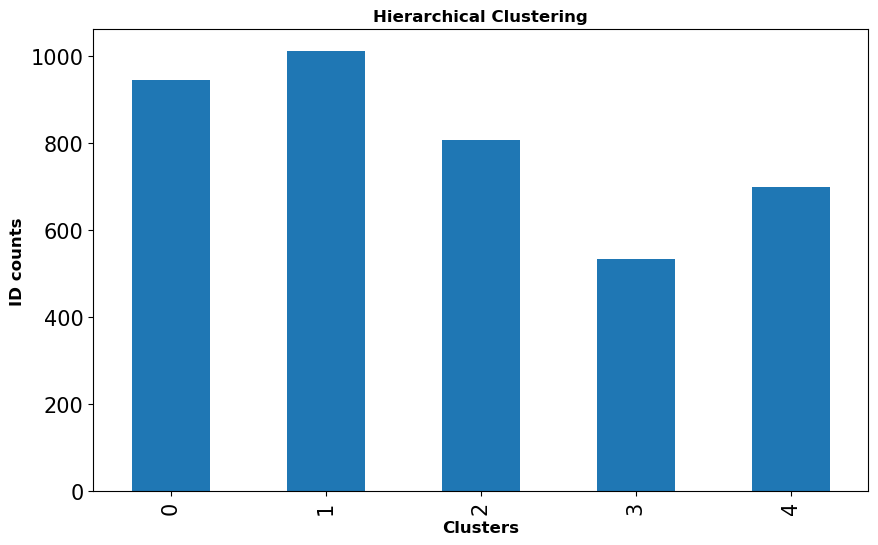

In [20]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_s1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
     

In [21]:
data1.groupby('clustersid_s1').agg(['mean']).reset_index()


,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


In [22]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score

sil_score= silhouette_score(scaler2_df, H_clusters.labels_)
sil_score
     

0.15099716875144398

# K-MEANS Clustering


In [23]:
# Import Library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
     

In [24]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [25]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)
     

[[0.01650773 0.         0.         ... 0.84374246 0.         0.25      ]
 [0.01128788 0.         0.         ... 0.83988425 0.         0.25      ]
 [0.02425685 0.         0.         ... 0.84784181 0.         0.25      ]
 ...
 [0.0431695  0.         0.5        ... 0.16879672 1.         0.        ]
 [0.03220189 0.         0.         ... 0.16867615 0.         1.        ]
 [0.00176908 0.         0.         ... 0.16831444 0.         1.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ...  1.39545434e+00
  -7.66919299e-01 -5.39219215e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ...  1.37995704e+00
  -7.66919299e-01 -5.39219215e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ...  1.41192021e+00
  -7.66919299e-01 -5.39219215e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -1.31560393e+00
   1.30391816e+00 -1.25111675e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -1.31608822e+00
  -7.66919299e-01  1.59647340e+00]
 [-7.00507951e-01 -1.862

In [26]:
#Build Cluster algorithm


# Using data normalized by MinMaxScaler
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(scaler1_df)

sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

# Using data normalized by StandardScaler
clusters_new2 = KMeans(5, random_state=42)
clusters_new2.fit(scaler2_df)

sil_score= silhouette_score(scaler2_df, clusters_new2.labels_)
print('Silhouette Score for data normalized by StandardScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.5738008183707116
Silhouette Score for data normalized by StandardScaler:  0.2602786082635666


In [27]:
#Assign clusters to the data set
data['clusterid_Kmeans'] = clusters_new1.labels_
data1['clusterid_Kmeans'] = clusters_new1.labels_
     

In [28]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

3    1196
1     947
2     699
0     623
4     534
Name: clusterid_Kmeans, dtype: int64

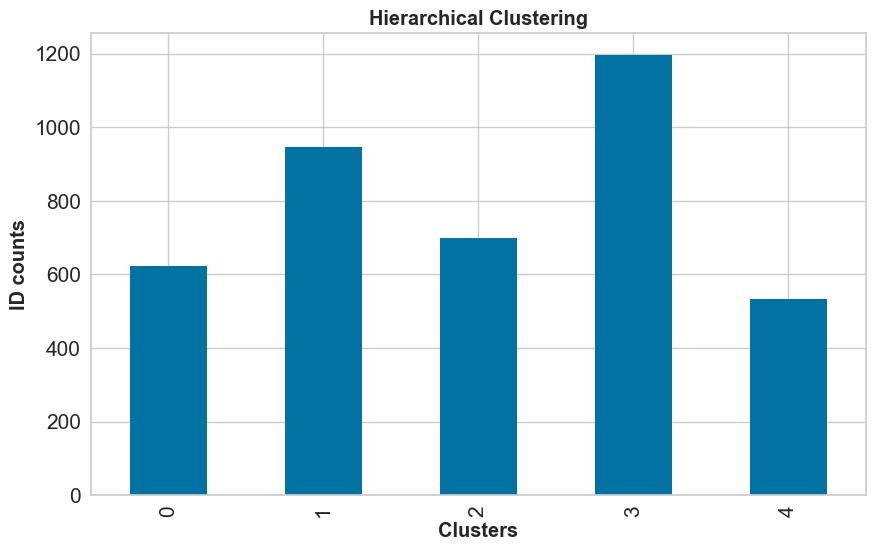

In [29]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_Kmeans']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
     

In [30]:
data1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()


,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,117878.845907,80.373997,3.571429,1.001605,1.022472,31252.101124,17.348315,228.321027,0.643660,4400.409310,0.0,2.000000
1,1,79987.306230,276.197466,1.694826,1.024287,1.002112,12123.870116,12.184794,796.133052,2.429778,4370.794087,1.0,0.006336
2,2,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,4.000000
3,3,46971.773411,85.259197,1.145485,1.028428,1.006689,3761.719064,6.646321,158.618729,0.484114,4834.708194,0.0,1.154682
4,4,127317.584270,176.352060,4.376404,1.000000,1.046816,58665.943820,22.162921,966.331461,2.900749,5075.983146,1.0,2.994382


# DBSCAN


In [31]:
from sklearn.cluster import DBSCAN


In [32]:

# Normalizing data using MinMaxScaler
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[0.01650773 0.         0.         ... 0.         0.25       0.75      ]
 [0.01128788 0.         0.         ... 0.         0.25       0.75      ]
 [0.02425685 0.         0.         ... 0.         0.25       0.75      ]
 ...
 [0.0431695  0.         0.5        ... 1.         0.         0.25      ]
 [0.03220189 0.         0.         ... 0.         1.         0.5       ]
 [0.00176908 0.         0.         ... 0.         1.         0.5       ]]


# We will try for different values of eps and mn_samples


In [33]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=1, min_samples=12)
dbscan.fit(scaler1_df)

DBSCAN(eps=1, min_samples=12)

In [34]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [35]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

0    2518
2     947
1     534
Name: clusterid_DBSCAN, dtype: int64

In [36]:
# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score
     

0.5125034085604827

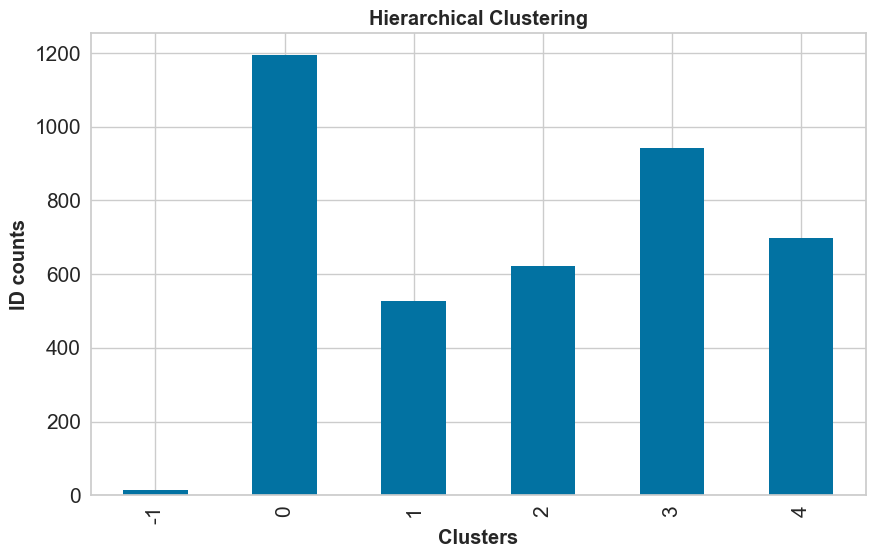

In [48]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster
from sklearn.cluster import DBSCAN
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# As more than 50% of data is in one cluster, we will try for lower value of epsilon


In [38]:
# for epsilon = 0.8
dbscan1 = DBSCAN(eps=0.8, min_samples=12)
dbscan1.fit(scaler1_df)

y=pd.DataFrame(dbscan1.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan1.labels_)
print('silhouette score: ',sil_score)
     

 0    2517
 2     945
 1     531
-1       6
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.512357760643999


In [39]:
# for epsilon = 0.6
dbscan2 = DBSCAN(eps=0.6, min_samples=12)
dbscan2.fit(scaler1_df)

y=pd.DataFrame(dbscan2.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan2.labels_)
print('silhouette score: ',sil_score)

 0    1893
 3     943
 2     623
 1     528
-1      12
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.5493487521861363


In [40]:
# for epsilon = 0.5
dbscan3 = DBSCAN(eps=0.5, min_samples=12)
dbscan3.fit(scaler1_df)

y=pd.DataFrame(dbscan3.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan3.labels_)
print('silhouette score: ',sil_score)



 0    1169
 3     926
 5     699
 2     618
 1     523
-1      48
 4      16
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.6039161450019925


In [41]:
# for epsilon = 0.55
dbscan4 = DBSCAN(eps=0.55, min_samples=12)
dbscan4.fit(scaler1_df)

y=pd.DataFrame(dbscan4.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= silhouette_score(scaler1_df, dbscan4.labels_)
print('silhouette score: ',sil_score)

 0    1194
 3     941
 4     699
 2     623
 1     527
-1      15
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.6472110375293022


# When we have value of epsilon = 0.55, we are getting 6 clusters with data less than 50% in one cluster and also, silhouette score is more as compared to other dbscan models.
-1 shows the noisy data points

In [42]:
data['clusterid_DBSCAN'] = dbscan4.labels_
data1['clusterid_DBSCAN'] = dbscan4.labels_
     

In [43]:
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clusterid_Kmeans,clusterid_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,3,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,4,1


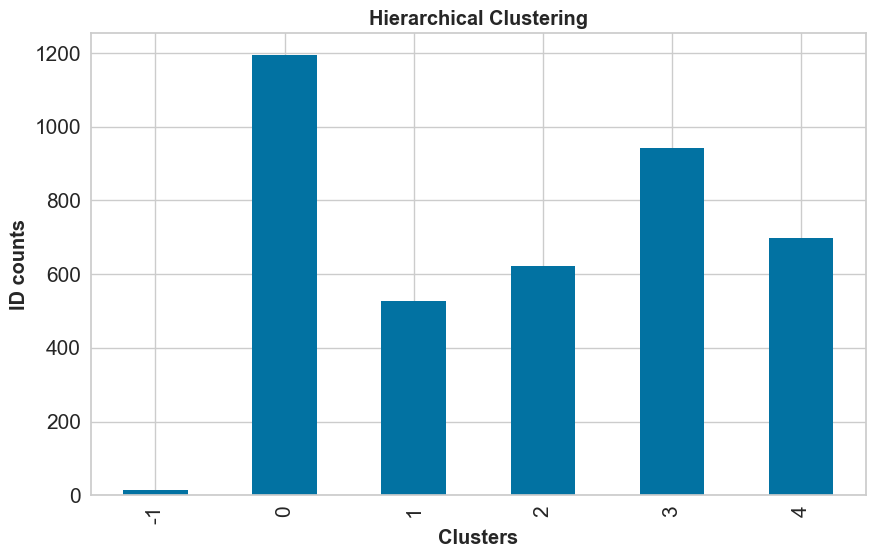

In [44]:
# Plotting barplot using groupby method to get visualization of how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_DBSCAN']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
     

In [45]:
data1.groupby('clusterid_DBSCAN').agg(['mean']).reset_index()


,clusterid_DBSCAN,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1,clusterid_Kmeans
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,209847.466667,859.666667,2.200000,1.266667,2.666667,81646.000000,33.266667,5451.666667,15.200000,4029.400000,0.866667,1.866667,2.666667
1,0,46928.491625,85.402010,1.145729,1.028476,1.000838,3657.580402,6.639866,158.884422,0.484925,4839.114740,0.000000,1.153266,3.000000
2,1,127752.781784,158.366224,4.387097,1.000000,1.017078,58105.311195,21.922201,874.865275,2.741935,5085.747628,1.000000,3.000000,4.000000
3,2,117878.845907,80.373997,3.571429,1.001605,1.022472,31252.101124,17.348315,228.321027,0.643660,4400.409310,0.000000,2.000000,0.000000
4,3,78010.375133,275.639745,1.699256,1.020191,1.000000,11790.217853,12.054198,772.720510,2.313496,4371.408077,1.000000,0.000000,1.000000
5,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.000000,4.000000,2.000000
